<a href="https://colab.research.google.com/github/nin844/it_practice/blob/main/pnadakabu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_datareader

In [2]:
from pandas_datareader import data  # 株価を読み込むためのライブラリ
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
start='2019-06-01'
end ='2020-06-01'

df = data.DataReader('^N225', 'yahoo', start, end) # Yahooから日経平均株価（start～end）を読み込む

In [5]:
df.head()
高値　安値　始値　終値　出来高（その日の取引量）　調整後の終値

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938


In [8]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [9]:
df.index #  日付として扱える

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14',
               ...
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-06-01', '2020-06-02'],
              dtype='datetime64[ns]', name='Date', length=243, freq=None)

In [10]:
date = df.index
price = df['Adj Close']

In [21]:
price

Date
2019-06-03    20410.880859
2019-06-04    20408.539062
2019-06-05    20776.099609
2019-06-06    20774.039062
2019-06-07    20884.710938
                  ...     
2020-05-27    21419.230469
2020-05-28    21916.310547
2020-05-29    21877.890625
2020-06-01    22062.390625
2020-06-02    22325.609375
Name: Adj Close, Length: 243, dtype: float64

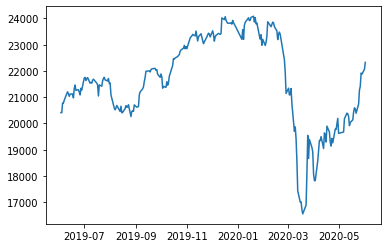

In [11]:
plt.plot(date,price,label='Close') # 線グラフの描画

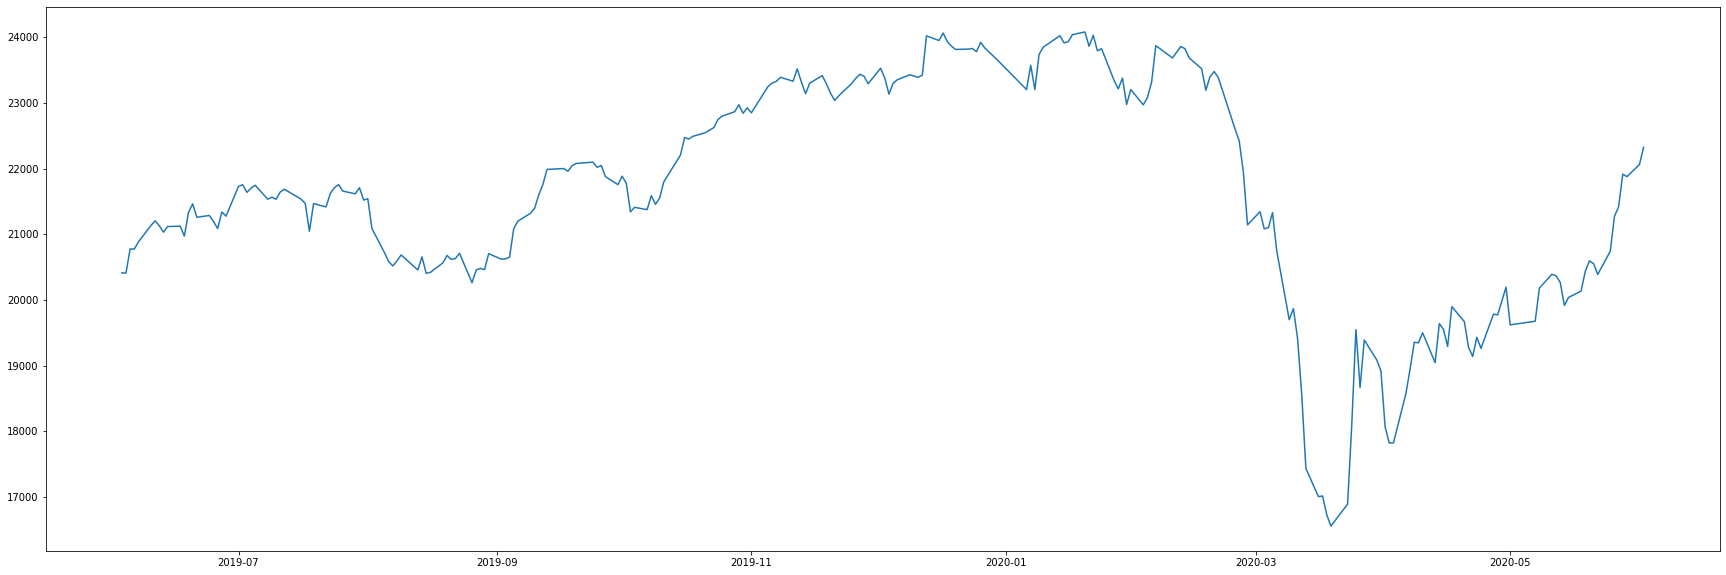

In [12]:
plt.figure(figsize=(30,10))
plt.plot(date,price)

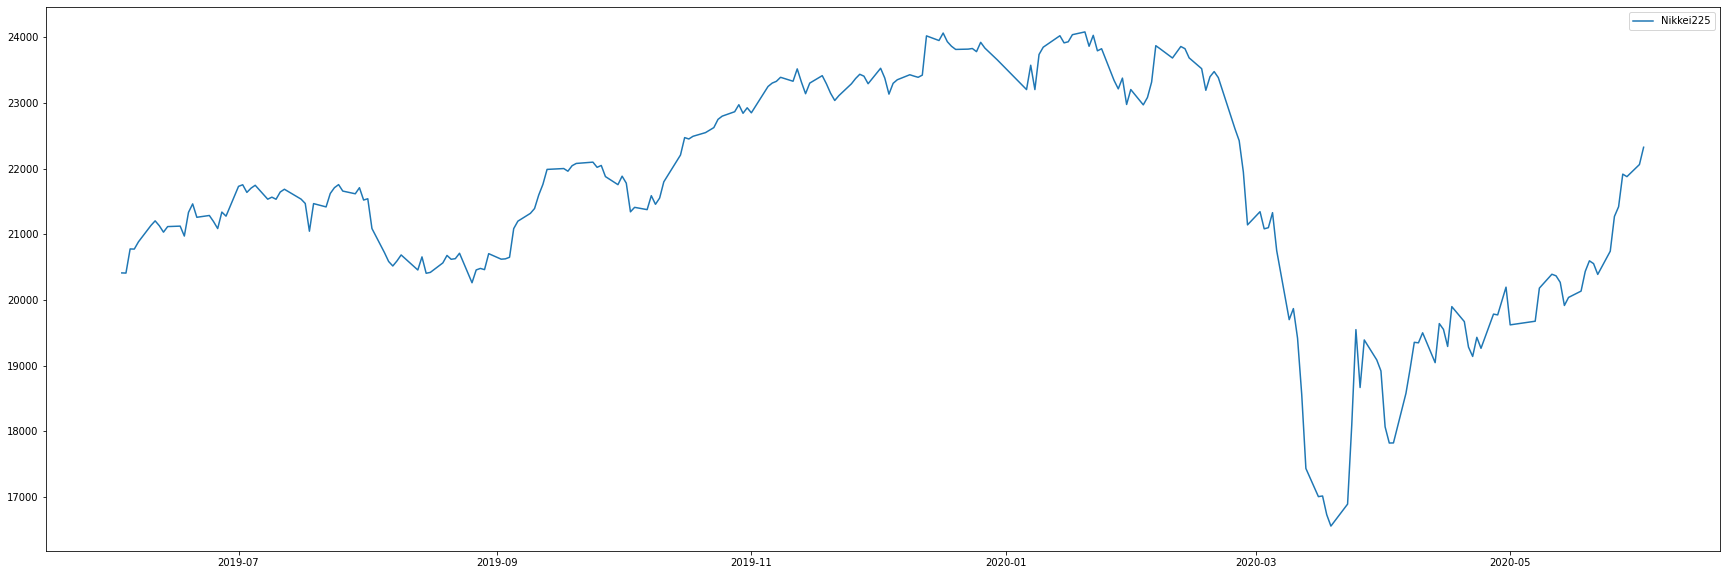

In [13]:
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.legend() # 凡例を書く

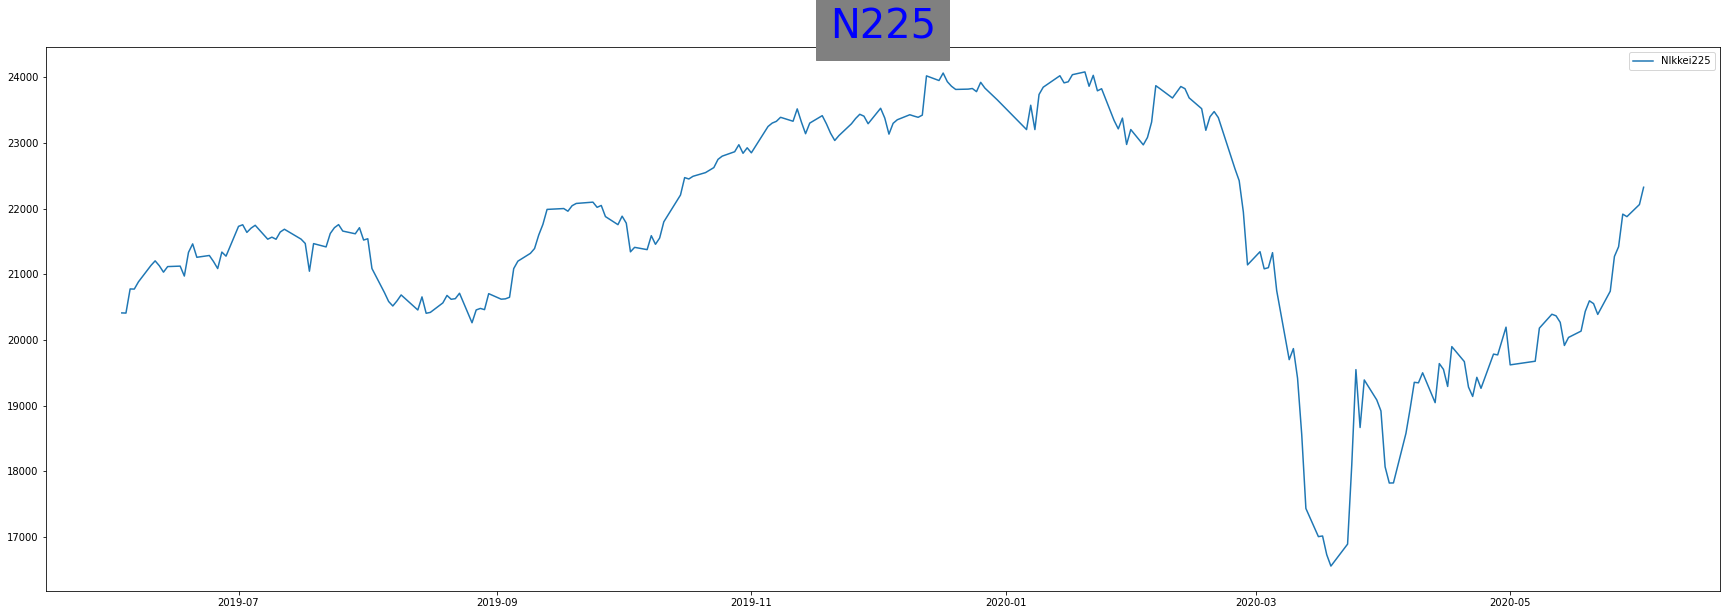

In [19]:
plt.figure(figsize=(30,10))
plt.plot(date,price,label='NIkkei225')
plt.title('N225', color='blue', backgroundcolor='grey', size=40, loc='center')
plt.legend()

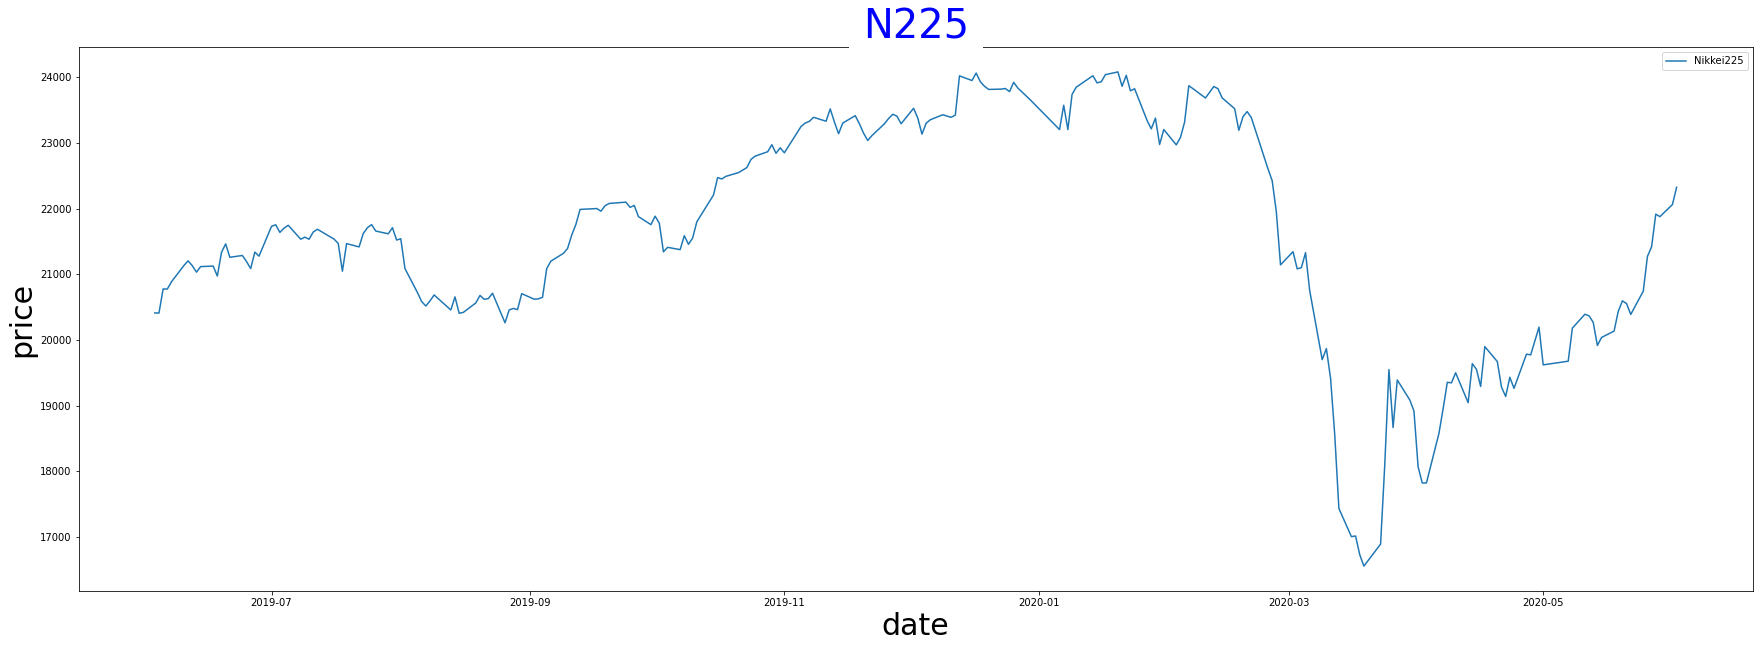

In [20]:
plt.figure(figsize=(30,10)) #グラフのサイズ
plt.plot(date,price,label='Nikkei225') # グラフの横軸、縦軸、グラフの名前
plt.title('N225', color='blue', backgroundcolor='white', size=40, loc='center') # グラフタイトルの名前、色、サイズ、位置
plt.xlabel('date',color='black', size=30) # ｘ軸のラベル
plt.ylabel('price', color='black',size=30) # Y軸のラベル
plt.legend()

In [23]:
# 単純移動平均の設定　（過去○○日分の平均　ほか加重移動平均など）
span01 = 5
span02  = 25
span03 = 50
# pandas で移動平均を求める ⇒ rolling 関数を使う
df['sma01'] = price.rolling(window=span01).mean() # window は間隔 mean:平均 max:最大 min:最小
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

In [27]:
pd.set_option('display.max_rows', None)
df.head(100)

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859,NaN,NaN,NaN
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062,NaN,NaN,NaN
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609,NaN,NaN,NaN
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062,NaN,NaN,NaN
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938,20650.853906,NaN,NaN
2019-06-10,21166.119141,21077.949219,21095.400391,21134.419922,58200000,21134.419922,20795.561719,NaN,NaN
2019-06-11,21227.179688,21066.619141,21099.539062,21204.279297,52100000,21204.279297,20954.709766,NaN,NaN
2019-06-12,21259.699219,21118.750000,21130.390625,21129.720703,56500000,21129.720703,21025.433984,NaN,NaN
2019-06-13,21111.230469,20932.130859,21040.910156,21032.000000,65700000,21032.000000,21077.026172,NaN,NaN


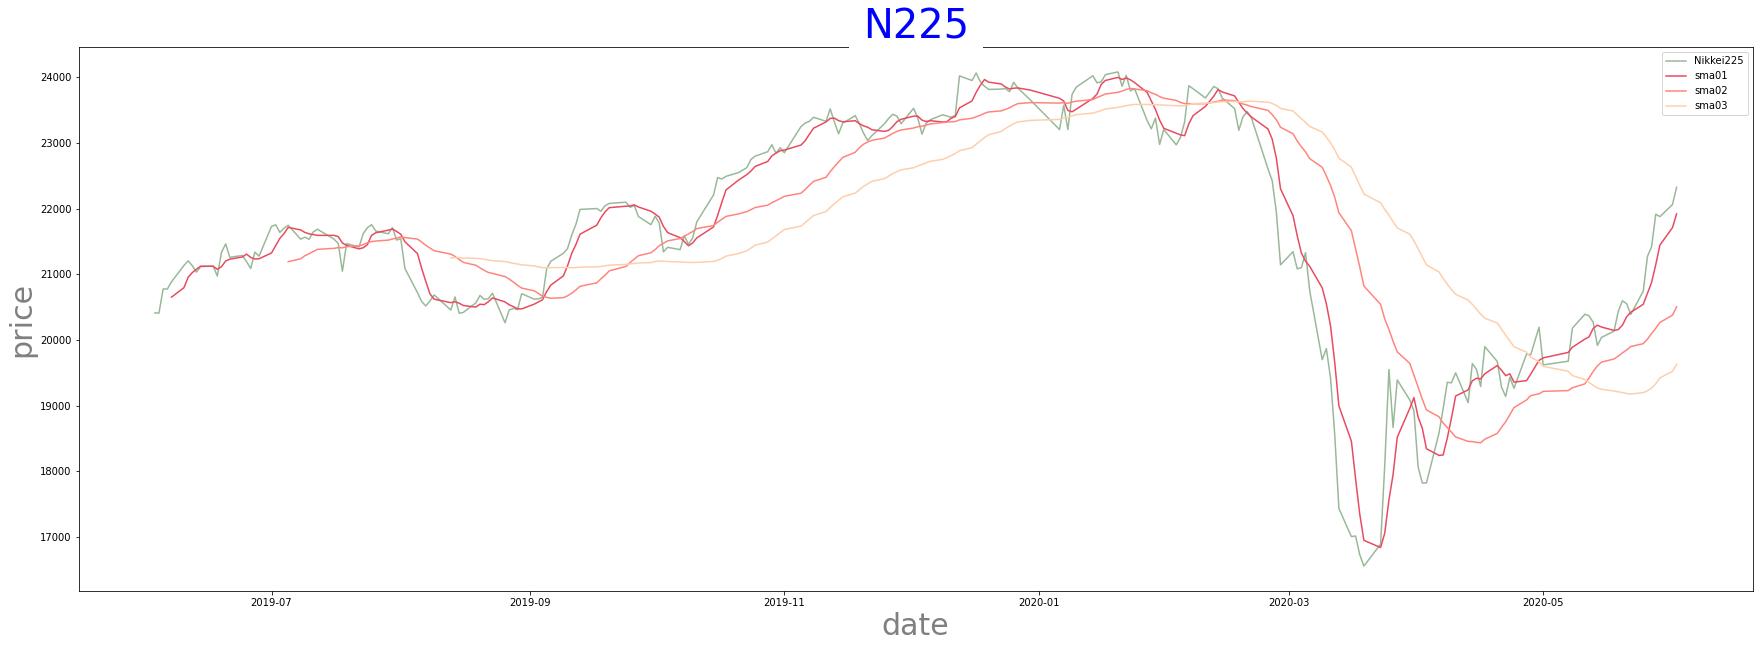

In [30]:
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225', color='#99b898')
plt.plot(date, df['sma01'], label='sma01',color='#e84a5f')
plt.plot(date, df['sma02'], label='sma02' ,color='#ff847c')
plt.plot(date, df['sma03'], label='sma03', color='#feceab')

plt.title('N225', color='blue', backgroundcolor='white', size=40, loc='center')
plt.xlabel('date', color='grey', size=30)
plt.ylabel('price', color='grey', size=30)

plt.legend()

In [31]:
# ゴールデンクロス(短期の移動平均線が中期以上の移動平均線を下から上に抜けること、価格上昇サイン）、デッドクロス（短期の移動平均線が中期以上線の移動平均を上から下に抜けること)

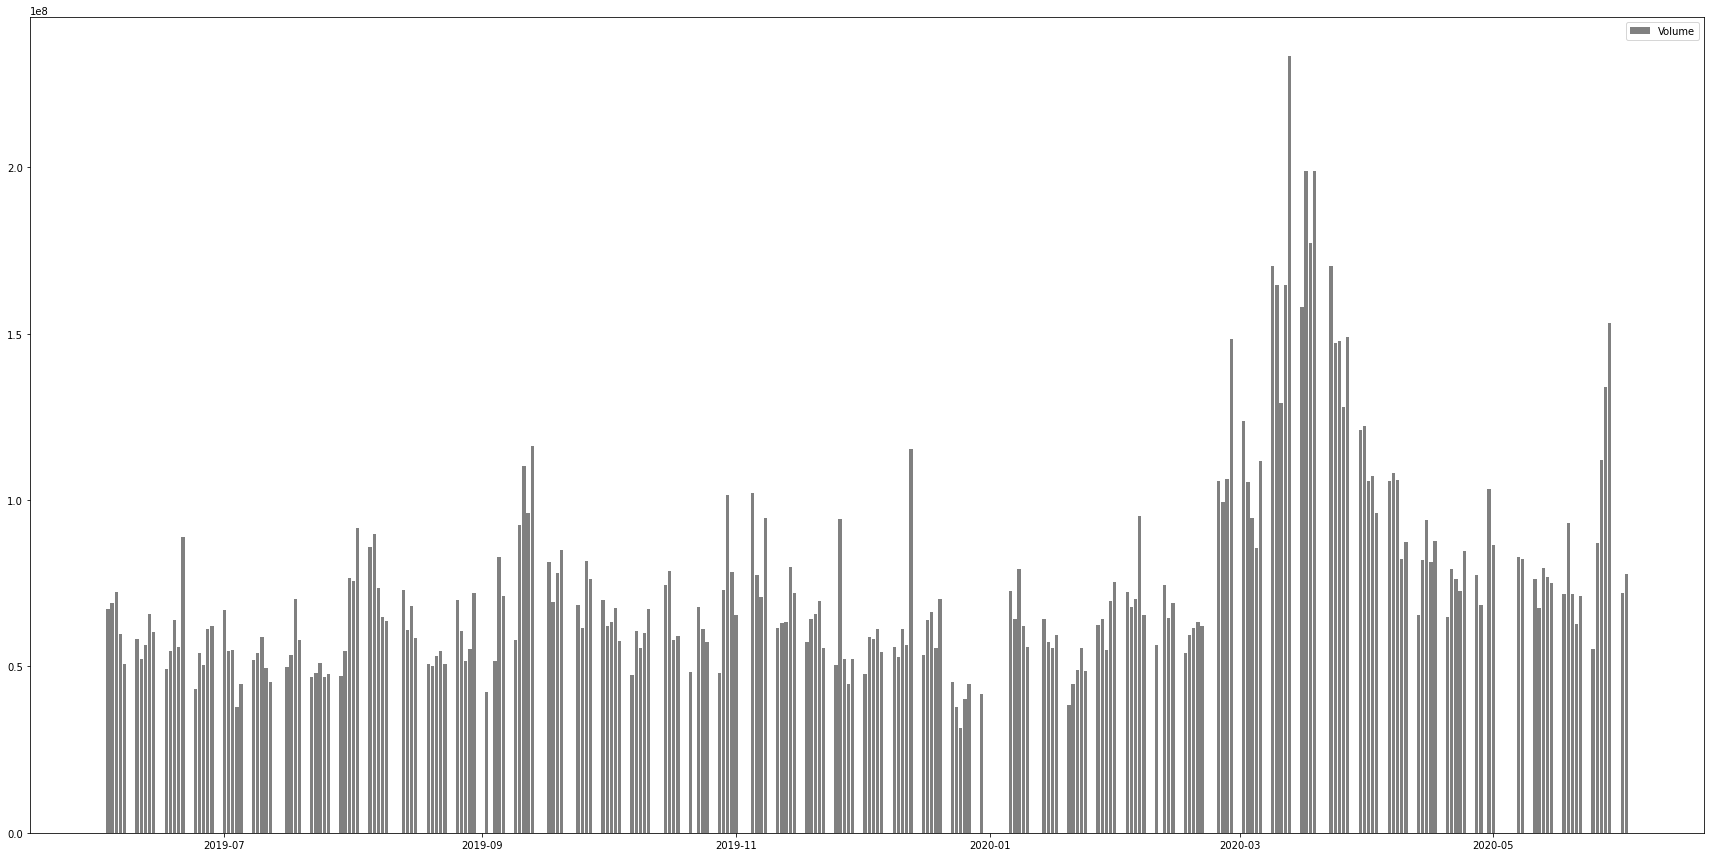

In [32]:
# 棒グラフを作る　出来高を見る
plt.figure(figsize=(30,15))
plt.bar(date,df['Volume'], label='Volume', color='grey')

plt.legend()

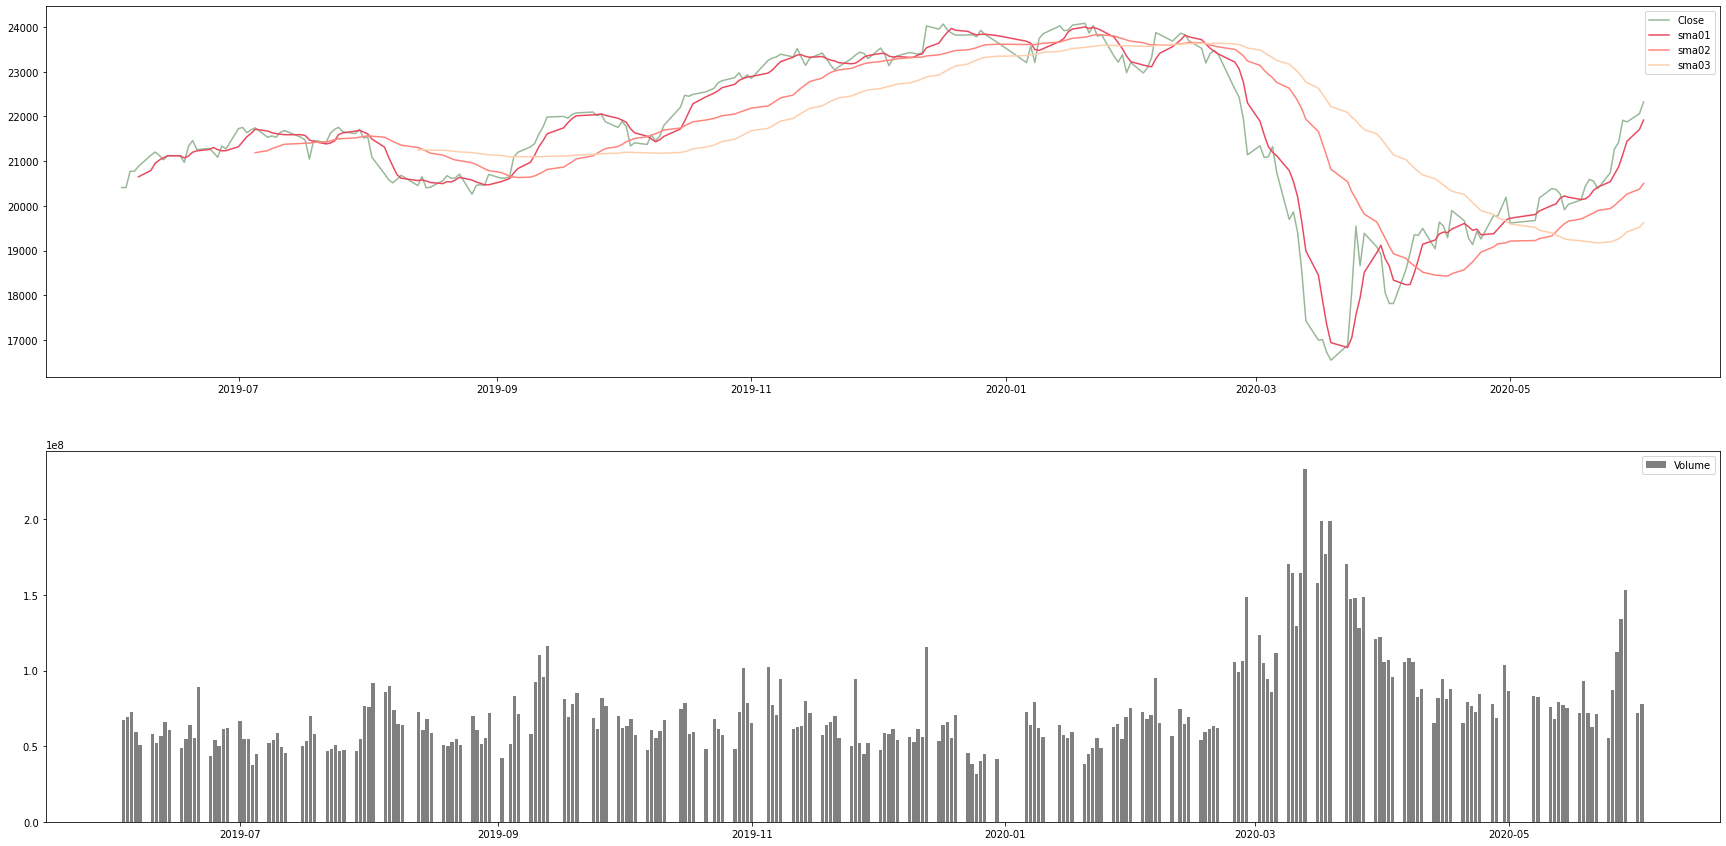

In [33]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)  #グラフを分割して描く　（縦方向の分割数、横方向の分割数、インデックス<？番目>)

plt.plot(date,price,label='Close', color='#99b898')
plt.plot(date,df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date,df['sma02'], label='sma02', color='#ff847c')
plt.plot(date, df['sma03'], label='sma03', color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.legend()

In [34]:
#　個別銘柄の株の取得
# リクルートホールディングス

In [43]:
# 証券コードを使ってデータを取得
df = data.DataReader('6098.JP', 'stooq')    # ホーランドのサイトでデータ取得

In [44]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-03,4715.0,4900.0,4710.0,4896.0,5072000
2021-02-02,4700.0,4703.0,4634.0,4696.0,2906000
2021-02-01,4579.0,4682.0,4566.0,4655.0,3061400
2021-01-29,4603.0,4655.0,4529.0,4542.0,3560700
2021-01-28,4500.0,4629.0,4500.0,4593.0,4790100


In [45]:
df.index.min()

Timestamp('2016-02-08 00:00:00')

In [46]:
df.index.max()

Timestamp('2021-02-03 00:00:00')

In [47]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-03,4715.0,4900.0,4710.0,4896.0,5072000
2021-02-02,4700.0,4703.0,4634.0,4696.0,2906000
2021-02-01,4579.0,4682.0,4566.0,4655.0,3061400
2021-01-29,4603.0,4655.0,4529.0,4542.0,3560700
2021-01-28,4500.0,4629.0,4500.0,4593.0,4790100


In [48]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-15,1113.77,1144.87,1092.46,1133.41,5501609
2016-02-12,1071.18,1082.65,1044.97,1056.43,8666361
2016-02-10,1164.54,1171.09,1102.30,1117.04,7115886
2016-02-09,1179.27,1195.66,1159.62,1172.72,4611741
2016-02-08,1195.66,1226.77,1185.83,1218.59,2685782


In [51]:
# データをソートする
df = df.sort_index()

In [52]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-08,1195.66,1226.77,1185.83,1218.59,2685782
2016-02-09,1179.27,1195.66,1159.62,1172.72,4611741
2016-02-10,1164.54,1171.09,1102.30,1117.04,7115886
2016-02-12,1071.18,1082.65,1044.97,1056.43,8666361
2016-02-15,1113.77,1144.87,1092.46,1133.41,5501609
2016-02-16,1120.31,1143.24,1113.77,1118.67,6608219
2016-02-17,1107.22,1118.67,1087.56,1099.01,4775978
2016-02-18,1135.06,1138.33,1107.22,1110.48,4832759
2016-02-19,1105.58,1112.13,1084.27,1087.56,3867184


In [53]:
df.index>='2019-06-01 00:00:00'

array([False, False, False, ...,  True,  True,  True])

In [ ]:
df[df.index>='2019-06-01 00:00:00']

In [57]:
df.index <= '2020-06-01 00:00:00'

array([ True,  True,  True, ..., False, False, False])

In [ ]:
df[df.index<='2020-06-01 00:00:00']

In [63]:
df=df[(df.index>='2019-06-01 00:00:00') & (df.index<= '2020-05-01 00:00:00')]

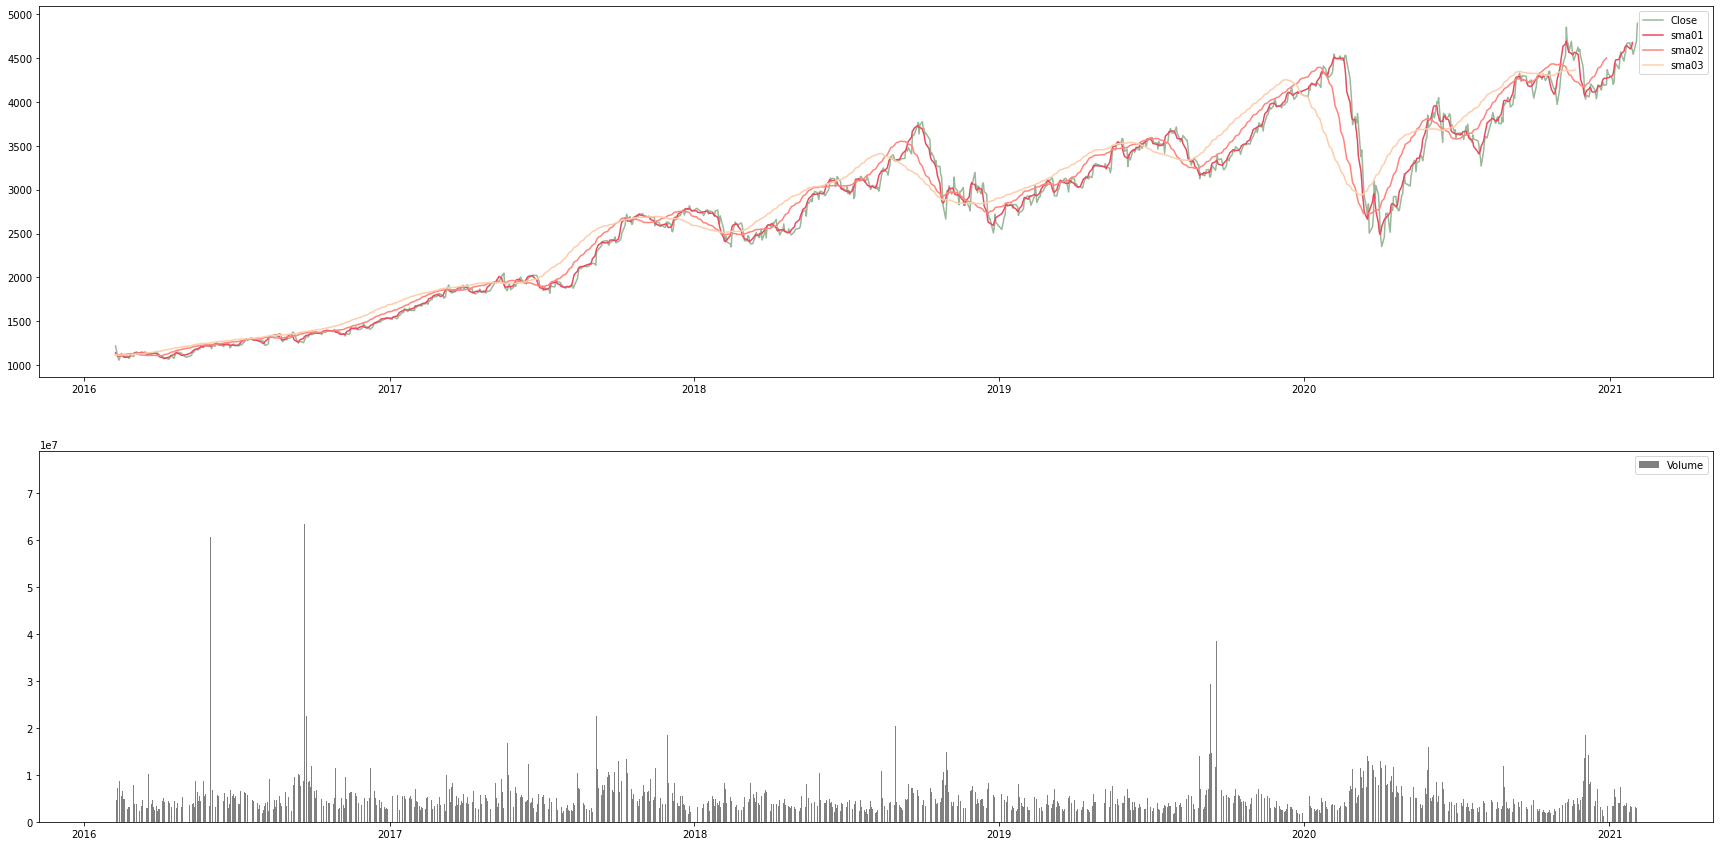

In [64]:
#リクルートホールディングス
df = data.DataReader('6098.JP', 'stooq')

date = df.index
price = df['Close']

span01 = 5
span02 = 25
span03 =50

df['sma01']=price.rolling(window=span01).mean()
df['sma02']=price.rolling(window=span02).mean()
df['sma03']=price.rolling(window=span03).mean()

plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date, price, label='Close', color='#99b898')
plt.plot(date, df['sma01'], label='sma01', color='#e84a5f' )
plt.plot(date, df['sma02'], label='sma02', color='#ff847c' )
plt.plot(date, df['sma03'], label='sma03', color='#feceab' )
plt.legend()

plt.subplot(2,1,2)
plt.bar( date, df['Volume'], label='Volume', color='grey')
plt.legend()

In [65]:
# ファーストリテイリング
start ='2019-06-01'
end = '2020-05-01'
company_code = '6502.JP'

In [ ]:
df = data.DataReader(company_code, 'stooq')
df = df[(df.index >= '2019-06-01 00:00:00') & (df.index <= '2020-05-01 00:00:00')]
df

In [ ]:
df = df.sort_index()
df

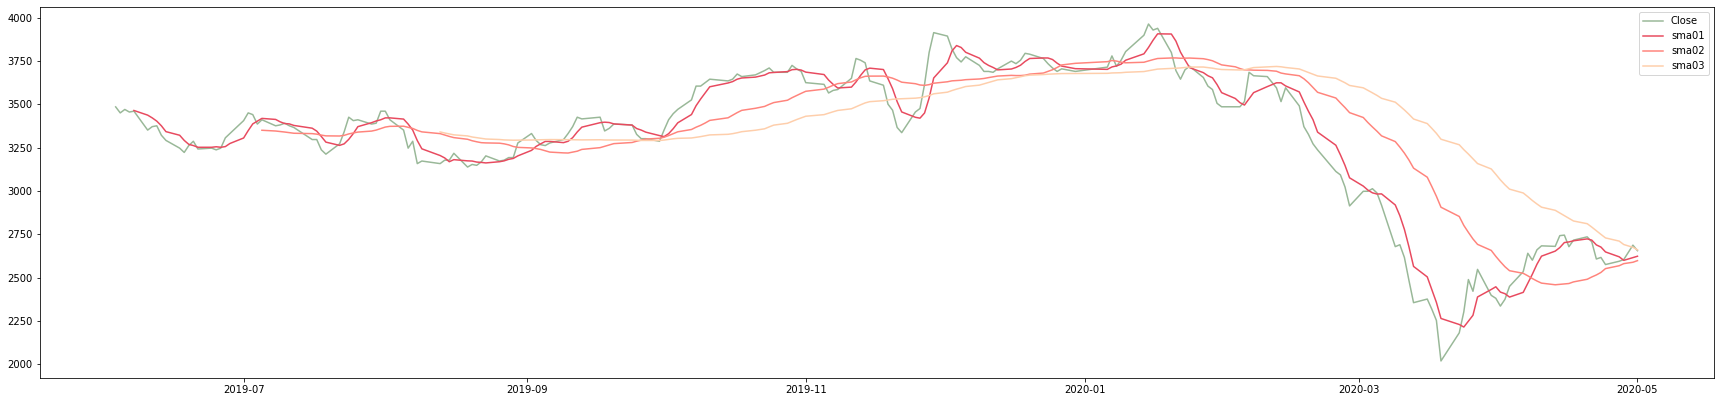

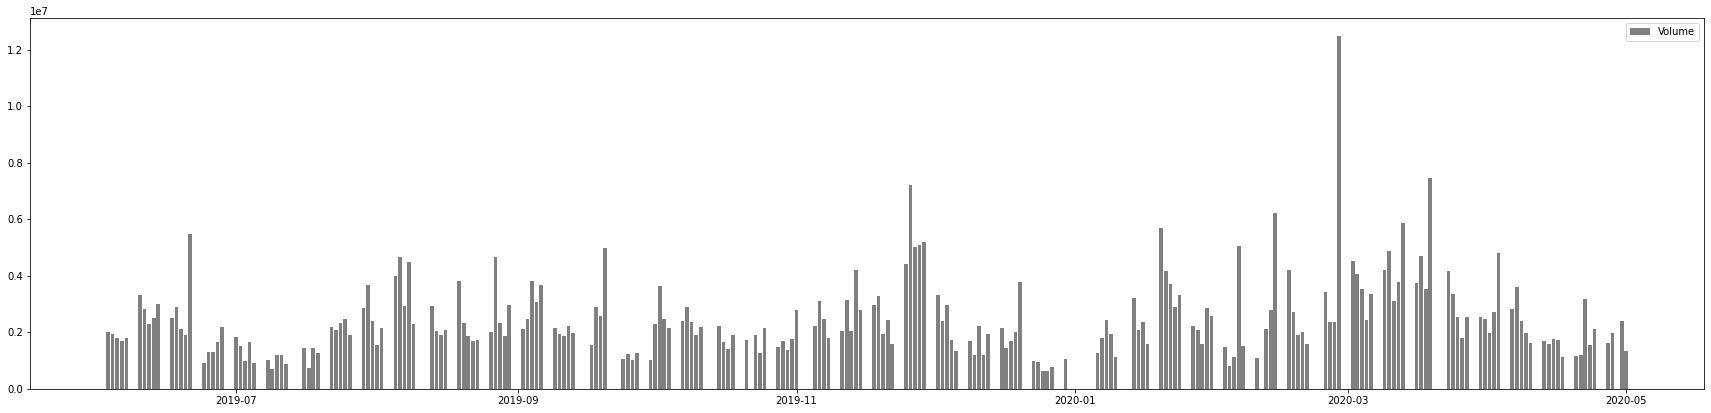

In [75]:
date = df.index
price =df['Close']

span01 = 5
span02 =25
span03=50

df['sma01']=price.rolling(window=span01).mean()
df['sma02']=price.rolling(window=span02).mean()
df['sma03']=price.rolling(window=span03).mean()

plt.figure(figsize=(30,15))
plt.subplot(2,1,1)
plt.plot(date, price,label='Close', color='#99b898')
plt.plot(date, df['sma01'], label='sma01', color='#e84a5f' )
plt.plot(date, df['sma02'], label='sma02', color='#ff847c' )
plt.plot(date, df['sma03'], label='sma03', color='#feceab' )
plt.legend()

plt.figure(figsize=(30,15))
plt.subplot(2,1,2)
plt.bar(date, df['Volume'],label='Volume', color='grey')
plt.legend()


In [79]:
def company_stock( start, end, company_code):

  df = data.DataReader(company_code, 'stooq')
  df = df[(df.index >= start) & (df.index <= end)]
  date = df.index
  price =df['Close']

  span01 = 5
  span02 =25
  span03=50

  df['sma01']=price.rolling(window=span01).mean()
  df['sma02']=price.rolling(window=span02).mean()
  df['sma03']=price.rolling(window=span03).mean()

  plt.figure(figsize=(20,10))
  plt.subplot(2,1,1)
  plt.plot(date, price,label='Close', color='#99b898')
  plt.plot(date, df['sma01'], label='sma01', color='#e84a5f' ) 
  plt.plot(date, df['sma02'], label='sma02', color='#ff847c' )
  plt.plot(date, df['sma03'], label='sma03', color='#feceab' )
  plt.legend()

  plt.figure(figsize=(20,10))
  plt.subplot(2,1,2)
  plt.bar(date, df['Volume'],label='Volume', color='grey')
  plt.legend()


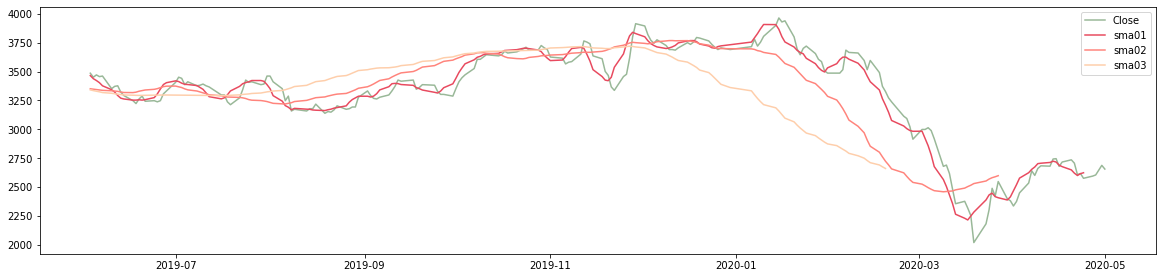

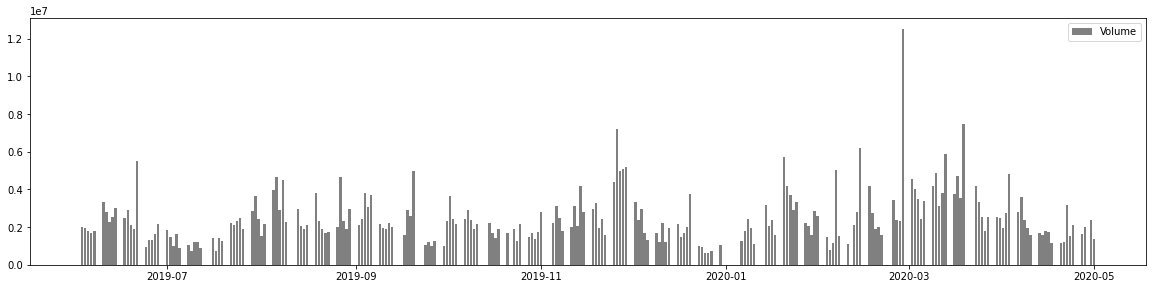

In [80]:
company_stock('2019-06-01', '2020-05-01', '6502.JP')

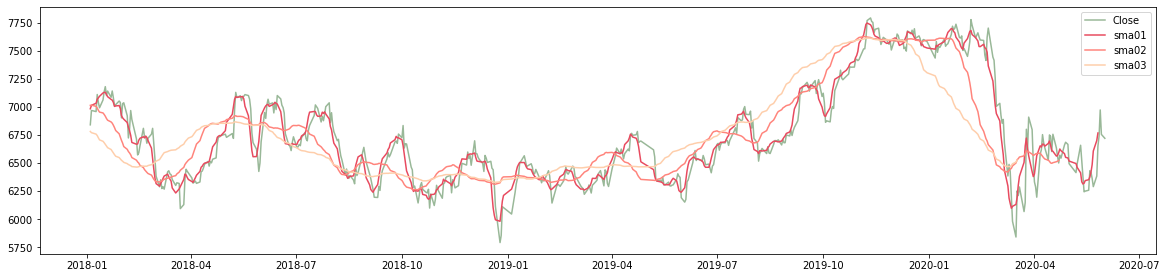

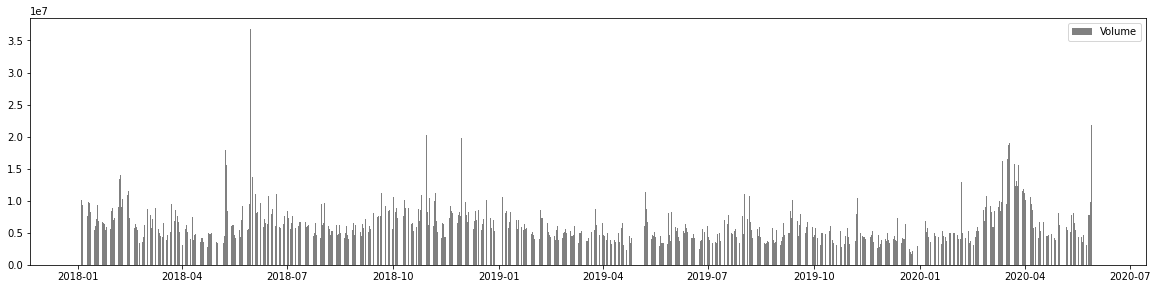

In [81]:
company_stock('2018-01-01', '2020-06-01', '7203.JP')